In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import match_template, peak_local_max


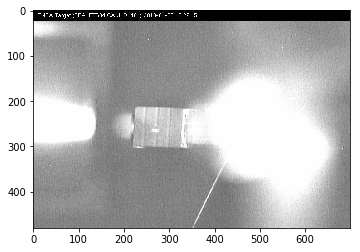

In [14]:
filename = '../images/jensa_images/JENSA_4_5_bestTune_1pm_lighton.PNG'
img = cv2.imread(filename)

nobeam = '../images/jensa_images/JENSA_2_22_14_28_light_on.PNG'
img_nobeam= cv2.imread(nobeam)

img.shape[:2]
plt.imshow(img)

In [195]:
print(beam_img)

[[[255 255 255]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[255 255 255]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[255 255 255]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 ...

 [[255 255 255]
  [ 98  98  98]
  [111 111 111]
  ...
  [118 118 118]
  [120 120 120]
  [119 119 119]]

 [[255 255 255]
  [102 102 102]
  [116 116 116]
  ...
  [118 118 118]
  [117 117 117]
  [115 115 115]]

 [[255 255 255]
  [108 108 108]
  [124 124 124]
  ...
  [115 115 115]
  [114 114 114]
  [113 113 113]]]


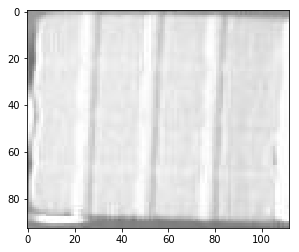

In [38]:
crop_nobeam = img_nobeam[215:308, 230:342].copy()

gray = cv2.cvtColor(crop_nobeam,cv2.COLOR_BGR2GRAY)
plt.imshow(crop_nobeam)

[54.0, 45.5]


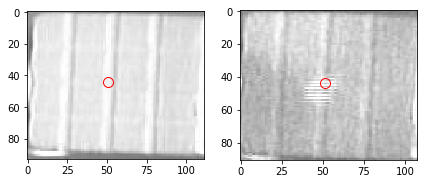

In [188]:
#this image is about 10 pixels more to the left than the one above
#214:301, 224:328 'adjusted center'

miny=212
maxy=303
minx=222
maxx=330

center_viewer=[ (maxx-minx)/2,(maxy-miny)/2]
crop_img = img[miny:maxy, minx:maxx].copy()
print(center_viewer)

manual_center= [44,51]
#distances, up:42, down: 43, left:50, right:105-50= 55

fig=plt.figure(figsize=(7,7))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)


ax1.imshow(crop_nobeam)
ax1.plot(manual_center[1], 
    manual_center[0], 
    'o', 
    markeredgecolor='r',
    markerfacecolor='none', 
    markersize=10
    )


ax2.imshow(crop_img)
ax2.plot(manual_center[1], 
    manual_center[0], 
    'o', 
    markeredgecolor='r',
    markerfacecolor='none', 
    markersize=10
    )

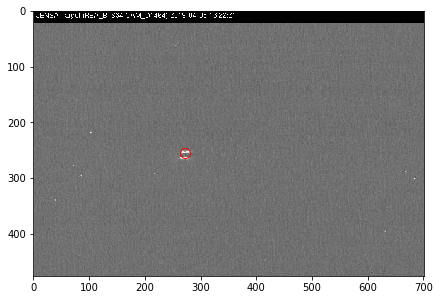

In [189]:
beam = '../images/jensa_images/JENSA_4_5_bestTune_1pm.PNG'
beam_img = cv2.imread(beam)
fig=plt.figure(figsize=(7,7))
plt.imshow(beam_img)
plt.plot(manual_center[1]+minx, 
    manual_center[0]+miny, 
    'o', 
    markeredgecolor='r',
    markerfacecolor='none', 
    markersize=10
    )

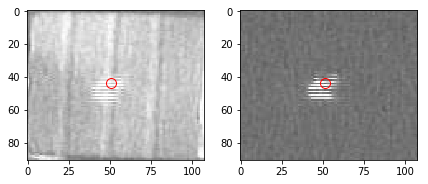

In [190]:
fig=plt.figure(figsize=(7,7))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

crop_beam = beam_img[miny:maxy, minx:maxx].copy()


ax1.imshow(crop_img)
ax1.plot(manual_center[1], 
    manual_center[0], 
    'o', 
    markeredgecolor='r',
    markerfacecolor='none', 
    markersize=10
    )


ax2.imshow(crop_beam)
ax2.plot(manual_center[1], 
    manual_center[0], 
    'o', 
    markeredgecolor='r',
    markerfacecolor='none', 
    markersize=10
    )

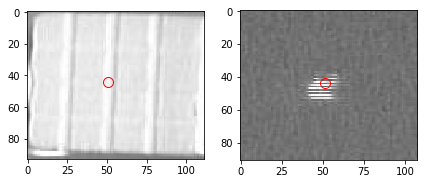

In [191]:
fig=plt.figure(figsize=(7,7))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.imshow(crop_nobeam)
ax1.plot(manual_center[1], 
    manual_center[0], 
    'o', 
    markeredgecolor='r',
    markerfacecolor='none', 
    markersize=10
    )

ax2.imshow(crop_beam)
ax2.plot(manual_center[1], 
    manual_center[0], 
    'o', 
    markeredgecolor='r',
    markerfacecolor='none', 
    markersize=10
    )

In [170]:
bg_file=  '../images/jensa_images/bg_3_36.PNG'
bg = cv2.imread(bg_file)
bg.shape
#plt.imshow(bg)
#adopt 2 mm = 28 pixels based on these images. so vertical lines and horizontal lines are 28 px apart

(482, 703, 3)

In [192]:
class Image:    
    def __init__(self, image):
        self.raw = image
        self.shape= image.shape
        self.x_size= image.shape[1]
        self.y_size= image.shape[0]
        self.subtracted_data= np.array([[0 for x in range(self.x_size)] for y in range(self.y_size)])
        self.profile_x= [0 in range (self.x_size)]
        self.profile_y= [0 in range (self.y_size)]
        self.offset_x= 0 
        self.offset_y= 0

    def subtract_bg(self,bg):
        print("Subtracting background...")
        if (bg.shape == self.shape): 
            for i in range(self.y_size):
                for j in range (self.x_size):
                    if ((self.raw[i][j]>bg[i][j]).all() and (bg[i][j]>=0).all() and (self.raw[i][j]>=0).all()):
                        self.subtracted_data[i][j]= self.raw[i][j]-bg[i][j]
                    elif (bg[i][j]<0):
                        self.subtracted_data[i][j]= 0
            return self.subtracted_data
        else:
            print("Error: Background image size :",bg.shape," does not match data size ",self.shape,".")
            
    def get_profile(self):
        print("Getting y-axis profile...")
        #PROFILE IN Y
        for i in range(self.y_size): #loop over all y
            sum=0
            for j in range(self.x_size): #loop over all x for each y: gives one number
                sum=sum + self.subtracted_data[i][j]
            self.profile_y.append(sum)
        self.offset_y= np.mean(self.profile_y[1:15])
        self.profile_y=self.profile_y[1:]- self.offset_y      
     
        #PROFILE IN X
        print("Getting x-axis profile...")
        for i in range(self.x_size): #loop over all x
            sum=0
            for j in range(self.y_size): #loop over all y for each x: gives one number
                sum=sum + self.subtracted_data[j][i]
            self.profile_x.append(sum)
        self.offset_x=np.mean(self.profile_x[1:15])
        self.profile_x=self.profile_x[1:]-self.offset_x

def findMedian(profile):
    sum_total=sum(profile)
    median=0
    sigp=0
    sign=0
    for i in range(len(profile)):
        sumInt=sum(profile[0:i])
        frac=sumInt/sum_total
        if (frac>0.15 and frac<0.17):
            sign=i
        elif (frac>0.48 and frac<0.52):
            median=i
        elif (frac>0.45 and frac<0.54):
            median=i
        elif (frac>0.41 and frac<0.58):
            median=i
        elif (frac>0.83 and frac<0.85):
            sigp=i
    if (median==0):
        print("Error when finding median. Check im_reduction ln 62.")
    return  median, sigp, sign

Subtracting background...
Error: Background image size : (482, 703, 3)  does not match data size  (91, 108, 3) .
Getting y-axis profile...
Getting x-axis profile...


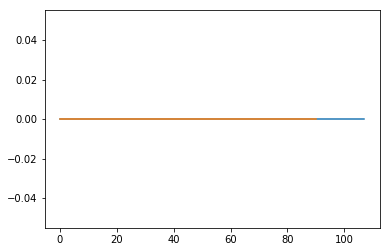

In [193]:
image=Image(crop_beam)
image.subtract_bg(bg)
image.get_profile()


plt.plot(image.profile_x)
plt.plot(image.profile_y)

In [194]:
print(beam_img[5][15])
image=Image(beam_img)
image.subtract_bg(bg[0:476,0:701])
image.get_profile()

plt.plot(image.profile_x)
plt.plot(image.profile_y)

[235 235 235]
Subtracting background...


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()